Importing libraries

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


Loading data 

In [41]:
df = pd.read_csv('best_sellers_amazon_2024_sunglasses.csv') #This dataset contains the information about the prices and rating from the sales of sunglasses in amazon

Showing the first 10 columns from the database 

In [26]:
df.head(10)

,title,brand,description,price/currency,price/value,stars,reviewsCount
0,SOJOS Retro Polarized Aviator Sunglasses for W...,SOJOS,NaN,NaN,NaN,4.4,8032.0
1,WearMe Pro - Reflective Lens Round Trendy Sung...,WearMe Pro,NaN,NaN,NaN,4.5,19647.0
2,TURBOPEP Square Polarized Sunglasses for Men a...,TURBOPEP,NaN,NaN,NaN,4.5,475.0
3,Locs Gangster Oversized Rectangular Horn Rim S...,Locs,Macho men's authentic OG Locs gangster shades ...,$,7.35,4.5,3090.0
4,ATTCL Polarized Wrap Sunglasses For Men - Fish...,ATTCL,NaN,NaN,NaN,4.4,6299.0
5,SOJOS Classic Square Sunglasses for Women Men ...,SOJOS,NaN,NaN,NaN,4.6,4397.0
6,MERRY'S Rectangular Polarized Sports Sunglasse...,MERRY'S,NaN,$,13.99,4.4,6977.0
7,SUNGAIT Vintage Round Sunglasses for Women Men...,SUNGAIT,NaN,NaN,NaN,4.6,51091.0
8,grinderPUNCH XL Men's Big Wide Frame Black Sun...,grinderPUNCH,Dark Black Tint Lens! Perfect for Days Spent o...,$,15.99,4.2,4207.0
9,Buyisgle Eye Glasses Holder Strap - Sunglasses...,Buyisgle,NaN,$,9.96,4.6,46.0


At first glance it is possible to see that there are NaN's values. Also, we can get the information from the data type and the entire structure of the database

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           260 non-null    object 
 1   brand           260 non-null    object 
 2   description     84 non-null     object 
 3   price/currency  100 non-null    object 
 4   price/value     100 non-null    float64
 5   stars           259 non-null    float64
 6   reviewsCount    259 non-null    float64
dtypes: float64(3), object(4)
memory usage: 14.3+ KB


We see that there are only 3 columns with value numbers and 4 with 'object' type.

Another method to use in this extraction of the data is describe

In [28]:
df.describe()

,price/value,stars,reviewsCount
count,100.000000,259.000000,259.000000
mean,20.997260,4.427413,5477.942085
std,22.397588,0.151675,8142.612586
min,0.007000,3.800000,14.000000
25%,13.725000,4.300000,853.500000
50%,15.985000,4.400000,2473.000000
75%,23.855000,4.500000,6123.000000
max,195.000000,4.800000,51091.000000


We can set the brand index in the data with the goal that it is better to 'scan' 

In [29]:
df1 = df.copy()

In [30]:
df1 = df1.set_index('brand')
df1

,title,description,price/currency,price/value,stars,reviewsCount
brand,,,,,,
SOJOS,SOJOS Retro Polarized Aviator Sunglasses for W...,NaN,NaN,NaN,4.4,8032.0
WearMe Pro,WearMe Pro - Reflective Lens Round Trendy Sung...,NaN,NaN,NaN,4.5,19647.0
TURBOPEP,TURBOPEP Square Polarized Sunglasses for Men a...,NaN,NaN,NaN,4.5,475.0
Locs,Locs Gangster Oversized Rectangular Horn Rim S...,Macho men's authentic OG Locs gangster shades ...,$,7.350,4.5,3090.0
ATTCL,ATTCL Polarized Wrap Sunglasses For Men - Fish...,NaN,NaN,NaN,4.4,6299.0
...,...,...,...,...,...,...
SA106,SA106 Mens Retro Vintage Narrow Rectangular Pi...,NaN,NaN,NaN,4.4,419.0
Dockers,"Dockers Men's Gavin Sunglasses Polarized Wrap,...",Feel comfortable during sports and active adve...,$,13.970,4.4,100.0
SUNGAIT,SUNGAIT Polygon Aviator Sunglasses for Men Pol...,NaN,NaN,NaN,4.5,1003.0


Now we can drop the columns that are not important for the analysis such as 'description', 'title' and 'price/currency'

In [31]:
columns_without_importance = ['title','description','price/currency']

In [32]:
df1 = df1.drop(columns=columns_without_importance)

In [33]:
df1

,price/value,stars,reviewsCount
brand,,,
SOJOS,NaN,4.4,8032.0
WearMe Pro,NaN,4.5,19647.0
TURBOPEP,NaN,4.5,475.0
Locs,7.350,4.5,3090.0
ATTCL,NaN,4.4,6299.0
...,...,...,...
SA106,NaN,4.4,419.0
Dockers,13.970,4.4,100.0
SUNGAIT,NaN,4.5,1003.0


In [34]:
df1.isna().sum()

price/value     160
stars             1
reviewsCount      1
dtype: int64

In [35]:
df1 = df1.fillna(0)

In [36]:
#df1.isna().sum()

In [37]:
df1

,price/value,stars,reviewsCount
brand,,,
SOJOS,0.000,4.4,8032.0
WearMe Pro,0.000,4.5,19647.0
TURBOPEP,0.000,4.5,475.0
Locs,7.350,4.5,3090.0
ATTCL,0.000,4.4,6299.0
...,...,...,...
SA106,0.000,4.4,419.0
Dockers,13.970,4.4,100.0
SUNGAIT,0.000,4.5,1003.0


Finally we can visualize the data using matlotlib seaborn 

RATING

<Axes: ylabel='stars'>

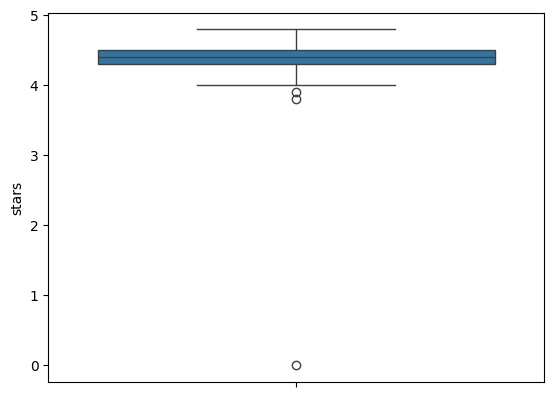

In [38]:
sns.boxplot(df1['stars'])

It is shown the rating where the minimum number of stars is above 4 and the maximum is nearly 5. We can get more precision with the describe method

In [39]:
df1['stars'].describe()

count    260.000000
mean       4.410385
std        0.313542
min        0.000000
25%        4.300000
50%        4.400000
75%        4.500000
max        4.800000
Name: stars, dtype: float64

PRICES 

<Axes: ylabel='brand'>

/Users/axeljimenez/Desktop/Data_analysis/glasses/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from current font.
  func(*args, **kwargs)
/Users/axeljimenez/Desktop/Data_analysis/glasses/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


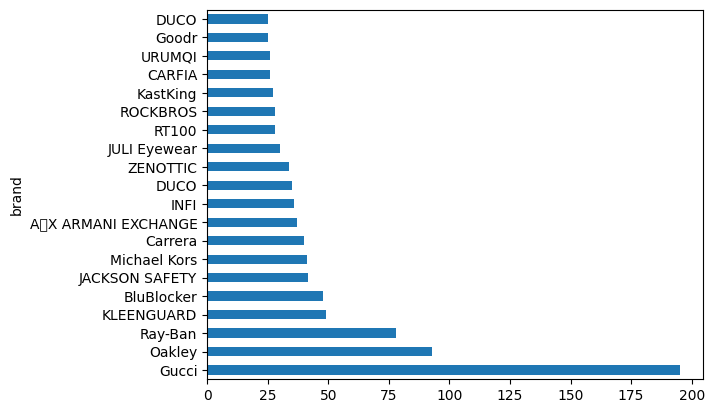

In [40]:
x = df1['price/value'].sort_values(ascending=False).drop_duplicates().head(20)
x.plot(kind='barh')

In this other visualization, we see that the brans 'Gucci', 'Oakley', 'Ray-Ban', 'KLEENGUARD' and 'BluBlocker' have the most expensive price of sunglasses in Amazon.